In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd

from pathlib import Path
import glob
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
files = list(Path('/content/drive/MyDrive/capstone project/').glob('./*.csv'))

In [ ]:
df_train = pd.read_csv(files[1])
df_test = pd.read_csv(files[0])

In [ ]:
df_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,198,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
df_train.shape, df_test.shape

((32951, 21), (8237, 21))

In [ ]:
label_encode = lambda x: 0 if x == "no" else 1

In [ ]:
df_train.y = df_train.y.map(label_encode)
df_test.y = df_test.y.map(label_encode)

In [ ]:
df_train.y.value_counts(), df_test.y.value_counts()

(0    29239
 1     3712
 Name: y, dtype: int64, 0    7309
 1     928
 Name: y, dtype: int64)

## EDA

In [ ]:
# get duplicated datas
df_train.duplicated().sum()

6

In [ ]:
# remove duplicates
df_train.drop_duplicates(inplace=True)

In [ ]:
df_train.duplicated().sum()

0

#### Check feature importances

In [ ]:
df_train.nunique()

age                 77
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1472
campaign            41
pdays               26
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          312
nr.employed         11
y                    2
dtype: int64

In [ ]:
df_train.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [ ]:
def subscription_ratio(columns, data):
  subscription_rate = df_train[df_train[columns] == data].y.value_counts(normalize=True)
  return subscription_rate

In [ ]:
df_train.pdays.value_counts()

999    31735
3        340
6        333
4         92
12        53
9         50
2         49
7         45
10        44
5         40
13        29
1         24
11        22
15        18
14        15
8         14
0         13
16         8
17         6
18         5
19         3
22         3
26         1
21         1
25         1
27         1
Name: pdays, dtype: int64

In [ ]:
subscription_ratio("pdays", 999)

0    0.907137
1    0.092863
Name: y, dtype: float64

In [ ]:
df_train.duration.value_counts()

85      147
90      145
72      133
106     132
124     131
       ... 
945       1
913       1
1616      1
1584      1
1871      1
Name: duration, Length: 1472, dtype: int64

In [ ]:
subscription_ratio('duration', 0)

0    1.0
Name: y, dtype: float64

##### poutcome

In [ ]:
subscription_ratio('poutcome', 'failure') 

0    0.859912
1    0.140088
Name: y, dtype: float64

In [ ]:
subscription_ratio('poutcome', 'success')

1    0.645985
0    0.354015
Name: y, dtype: float64

In [ ]:
subscription_ratio('poutcome', 'nonexistent') 

0    0.911159
1    0.088841
Name: y, dtype: float64

Last outcome was failure then it contributes to 0.85 to class_0 and 0.14 to class_1. If outcome is success then 0.64 percent people subscribe and 0.35 do not subscribe. If previous outcome is 'nonexistent' then there is 91 percent of people not subscribing.

##### loan

In [ ]:
subscription_ratio('loan', 'yes')

0    0.892509
1    0.107491
Name: y, dtype: float64

In [ ]:
subscription_ratio('loan', 'no')

0    0.886107
1    0.113893
Name: y, dtype: float64

In [ ]:
subscription_ratio('loan', 'unknown')


0    0.896203
1    0.103797
Name: y, dtype: float64

Taking a loan contributes to 0.90 to class 0 and with not taking loan or if loan is unknown.

#### Feature Selection

In [ ]:
df_train.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [ ]:
# get integer columns

columns = list(df_train.columns)
integer_columns = list(df_train.select_dtypes(include=['int64', 'float64']).columns)
categorical_columns = list(df_train.select_dtypes(include=['object']).columns)

In [ ]:
integer_columns

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y']

In [ ]:
categorical_columns

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [ ]:
# check min, max values
df_train[integer_columns].describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,32945.000000,32945.000000,32945.000000,32945.000000,32945.000000,32945.000000,32945.000000,32945.000000,32945.000000,32945.000000,32945.000000
mean,40.001761,258.865594,2.558446,962.530490,0.172651,0.084732,93.575132,-40.491826,3.624456,5167.142352,0.112673
std,10.410801,259.186248,2.732564,186.774013,0.493522,1.570086,0.578046,4.629506,1.734135,72.200203,0.316197
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.000000,320.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.000000,4199.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


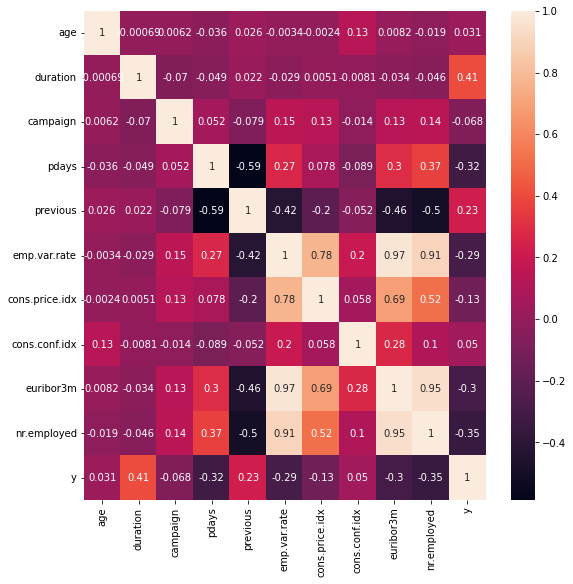

In [ ]:
ax, fig = plt.subplots(figsize = (9, 9))
sns.heatmap(df_train[integer_columns].corr(), annot=True, fmt='.2g')
plt.show()

duration is highly correlated with target so we remove duration.

In [ ]:

# we dropped duration because our model wont' learn anything new if one features is controlling all the prediction
df_train  = df_train.drop(['duration'], axis=1)

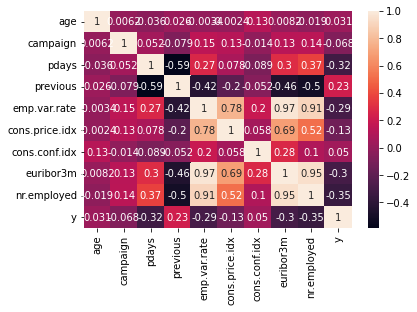

In [ ]:
sns.heatmap(df_train.corr(), annot=True)

In [ ]:
corr_matrix = df_train.corr()

In [ ]:
 # Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
age,NaN,0.006178,-0.035638,0.026450,-0.003415,-0.002450,0.130176,0.008170,-0.019034,0.030876
campaign,NaN,NaN,0.052453,-0.078812,0.150675,0.126245,-0.013804,0.134788,0.143771,-0.067626
pdays,NaN,NaN,NaN,-0.587719,0.271570,0.078211,-0.088941,0.297343,0.372911,-0.320908
previous,NaN,NaN,NaN,NaN,-0.422333,-0.204222,-0.051572,-0.455791,-0.502315,0.227609
emp.var.rate,NaN,NaN,NaN,NaN,NaN,0.775060,0.195730,0.972200,0.906903,-0.293161
cons.price.idx,NaN,NaN,NaN,NaN,NaN,NaN,0.057919,0.687982,0.521154,-0.134383
cons.conf.idx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.276963,0.101053,0.049692
euribor3m,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.945182,-0.301817
nr.employed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.347869
y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Find index of feature columns with correlation greater than 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
print(to_drop)

['euribor3m', 'nr.employed']


In [ ]:
# lets drop these features
# Drop Marked Features
df_train = df_train.drop(to_drop ,axis=1)

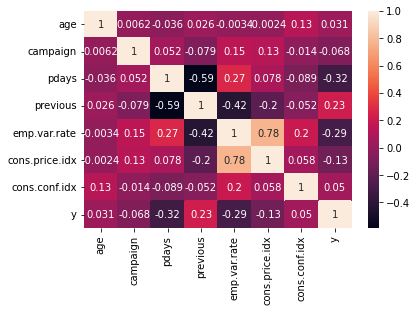

In [ ]:
sns.heatmap(df_train.corr(), annot=True)

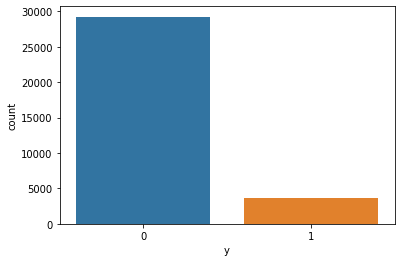

In [ ]:
sns.countplot(x = df_train['y'], label="Count")
plt.show()

#### Preprocessing

Check categorical value, and if the category is in ordinal change it to integer using labelencoder and other value change it to vectors.

In [ ]:
for col in categorical_columns:
  print(df_train[col].value_counts())

admin.           8305
blue-collar      7387
technician       5393
services         3205
management       2291
retired          1395
entrepreneur     1172
self-employed    1166
housemaid         838
unemployed        816
student           707
unknown           270
Name: job, dtype: int64
married     19883
single       9317
divorced     3681
unknown        64
Name: marital, dtype: int64
university.degree      9689
high.school            7601
basic.9y               4829
professional.course    4210
basic.4y               3359
basic.6y               1838
unknown                1403
illiterate               16
Name: education, dtype: int64
no         26102
unknown     6840
yes            3
Name: default, dtype: int64
yes        17311
no         14844
unknown      790
Name: housing, dtype: int64
no         27122
yes         5033
unknown      790
Name: loan, dtype: int64
cellular     20924
telephone    12021
Name: contact, dtype: int64
may    11016
jul     5783
aug     4984
jun     4189
nov   

In [ ]:
#change the categorical_value to integer
poutcome_change = {
    "nonexistent": -1,
    "failure": 0,
    "success": 1
}

loan_change = {
    "no": 0,
    "yes": 1,
    "unknown": -1
}

housing_change = {
    "no": 0,
    "yes": 1,
    "unknown": -1
}

default_change = {
    "yes": 1,
    "unknown": -1,
    "no": 0
}

In [ ]:
df_train.default  = df_train.default.map(default_change)
df_train.housing = df_train.housing.map(housing_change)
df_train.loan = df_train.loan.map(loan_change)
df_train.poutcome = df_train.poutcome.map(poutcome_change)
df_train['pdays'] = df_train.pdays.replace({999:-1})

In [ ]:
df_train.default.value_counts(), df_train.housing.value_counts(), df_train.pdays.value_counts()

( 0    26102
 -1     6840
  1        3
 Name: default, dtype: int64,  1    17311
  0    14844
 -1      790
 Name: housing, dtype: int64, -1     31735
  3       340
  6       333
  4        92
  12       53
  9        50
  2        49
  7        45
  10       44
  5        40
  13       29
  1        24
  11       22
  15       18
  14       15
  8        14
  0        13
  16        8
  17        6
  18        5
  19        3
  22        3
  27        1
  25        1
  26        1
  21        1
 Name: pdays, dtype: int64)

In [ ]:
df_train.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
y                 0
dtype: int64

In [ ]:
df_train.loan.value_counts(), df_train.poutcome.value_counts()

( 0    27122
  1     5033
 -1      790
 Name: loan, dtype: int64, -1    28444
  0     3405
  1     1096
 Name: poutcome, dtype: int64)

In [ ]:
# i think its better to change categorical data to one-hot than to use labelencoder as we the data is not in order.
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV, KFold

In [ ]:
X_train, X_val , y_train, y_val = train_test_split(df_train.drop('y', axis=1), df_train['y'], test_size = 0.3, shuffle=True, random_state = 2, stratify = df_train['y'])

In [ ]:
y_train.value_counts(), y_val.value_counts()

(0    20463
 1     2598
 Name: y, dtype: int64, 0    8770
 1    1114
 Name: y, dtype: int64)

## Utils functions

In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, classification_report, plot_confusion_matrix, precision_score, recall_score

In [ ]:
# plot the roc and auc curve
def plot_roc_curve(model_name, fpr, tpr):
  plt.plot([0, 1], [0, 1], linestyle = '--', label = 'No skill')
  plt.plot(fpr, tpr, marker='.', label =model_name)

def precision_recall_score(y_true, y_pred):
  precision = precision_score(y_true, y_pred)
  recall = recall_score(y_true, y_pred)
  return precision, recall

## Train the model

 Train model with default parameters . Without Hyperparameter Tuning and without handling of imbalanced class.


In [ ]:
!pip install catboost --quiet
!pip install xgboost --quiet

In [ ]:
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

### LogisticRegression

In [ ]:
pipe = Pipeline([('dict_vect', DictVectorizer(sparse=False)),
                 ('scale', StandardScaler()),
                 ('lr', LogisticRegression(random_state = 12, max_iter = 1000))])

In [ ]:
X_train = X_train.to_dict("records")

In [ ]:
X_val = X_val.to_dict("records")

In [ ]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('dict', DictVectorizer(sparse=False)),
                ('scaler', StandardScaler()),
                ('catboost',
                 <catboost.core.CatBoostClassifier object at 0x7f4ec98b8c50>)])

In [ ]:
y_pred = pipe.predict(X_val)
y_pred_proba = pipe.predict_proba(X_val)[:, 1]

In [ ]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)

In [ ]:
print(classification_report(y_val, y_pred, target_names = ['class_0', 'class_1'], digits=5))

              precision    recall  f1-score   support

     class_0    0.90765   0.98620   0.94530      8770
     class_1    0.65915   0.21005   0.31858      1114

    accuracy                        0.89873      9884
   macro avg    0.78340   0.59813   0.63194      9884
weighted avg    0.87964   0.89873   0.87466      9884



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


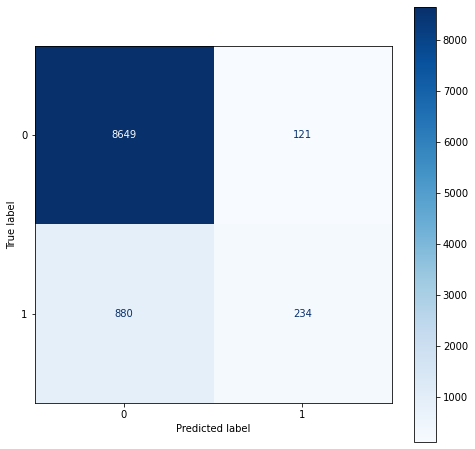

In [ ]:
fig, ax = plt.subplots(figsize = (8, 8))
plot_confusion_matrix(pipe, X_val, y_val, cmap = plt.cm.Blues, ax=ax)
plt.show()

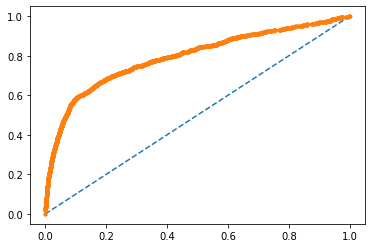

In [ ]:
plot_roc_curve("LogisticRegression", fpr, tpr)

### XgboostClassifier with GPU

In [ ]:
pipe = Pipeline([('dict', DictVectorizer(sparse=False)),('scaler', StandardScaler()), ('xgb', XGBClassifier(random_state = 10, tee_method = "gpu_hist"))])

In [ ]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('dict', DictVectorizer(sparse=False)),
                ('scaler', StandardScaler()),
                ('xgb', XGBClassifier(random_state=10, tee_method='gpu_hist'))])

In [ ]:
y_pred = pipe.predict(X_val)
y_pred_proba = pipe.predict_proba(X_val)[:, 1]

In [ ]:
fpr, tpr, thresholds  =roc_curve(y_val, y_pred_proba)

In [ ]:
print(classification_report(y_val, y_pred, target_names = ['class_0', 'class_1'], digits=5))

              precision    recall  f1-score   support

     class_0    0.90530   0.98871   0.94517      8770
     class_1    0.67647   0.18582   0.29155      1114

    accuracy                        0.89822      9884
   macro avg    0.79089   0.58726   0.61836      9884
weighted avg    0.87951   0.89822   0.87150      9884



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


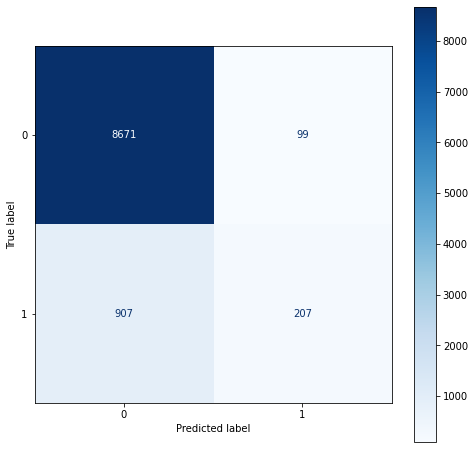

In [ ]:
fig, ax = plt.subplots(figsize = (8, 8))
plot_confusion_matrix(pipe, X_val, y_val, cmap = plt.cm.Blues, ax=ax)
plt.show()

   better prediction than logistic regression

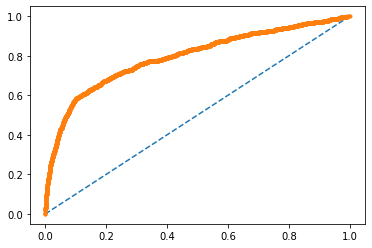

In [ ]:
plot_roc_curve("XGBclassifier", fpr, tpr)

### CatboostClassifier with GPU

In [ ]:
pipe = Pipeline([('dict', DictVectorizer(sparse=False)),
                 ('scaler', StandardScaler()), ('catboost', CatBoostClassifier(silent=True, random_seed=11, task_type="GPU",
                           devices='0:1'))]) # silent= True , do not show training info

In [ ]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('dict', DictVectorizer(sparse=False)),
                ('scaler', StandardScaler()),
                ('catboost',
                 <catboost.core.CatBoostClassifier object at 0x7f4ec92b4110>)])

In [ ]:
y_pred = pipe.predict(X_val)
y_pred_proba = pipe.predict_proba(X_val)[:, 1]

In [ ]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)

In [ ]:
print(classification_report(y_val, y_pred, target_names = ['class_0', 'class_1'], digits=5))

              precision    recall  f1-score   support

     class_0    0.90885   0.98575   0.94574      8770
     class_1    0.66398   0.22172   0.33244      1114

    accuracy                        0.89964      9884
   macro avg    0.78642   0.60374   0.63909      9884
weighted avg    0.88125   0.89964   0.87662      9884



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


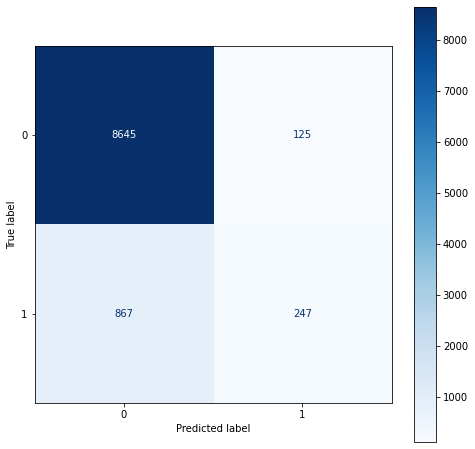

In [ ]:
fig, ax = plt.subplots(figsize = (8, 8))
plot_confusion_matrix(pipe, X_val, y_val, cmap = plt.cm.Blues, ax=ax)
plt.show()

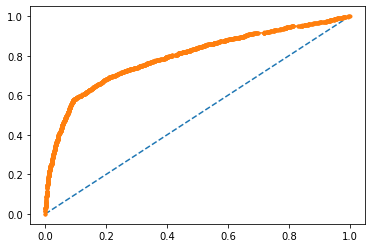

In [ ]:
plot_roc_curve("Catboostclassifier", fpr, tpr)

 We trained model without hyperparameter tuning and it seems catBoostClassifier performed better than logisticregression and XGBoostclassifier. It seems the model is not doing well because the data is imblanaced so lets handle the imbalanced data and also tune the parameter.

## Train the model( Hyperparameter Tuning)

### LogisticRegression

In [ ]:
pipe = Pipeline([('dict', DictVectorizer(sparse=False)),('scaler', StandardScaler()), ('lr', LogisticRegression(random_state = 10, max_iter = 5000))])
grid_search = {
    "lr__C": [1e-1, 1e-0, 1e-3, 1e+1],
    'lr__solver': ['sag', 'liblinear', 'lbfgs'],
}
cv = KFold(n_splits = 5, random_state=10, shuffle=True)
grid_search = GridSearchCV(pipe, grid_search, scoring = "f1_weighted", cv = cv, n_jobs=1)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=10, shuffle=True),
             estimator=Pipeline(steps=[('dict', DictVectorizer(sparse=False)),
                                       ('scaler', StandardScaler()),
                                       ('lr',
                                        LogisticRegression(max_iter=5000,
                                                           random_state=10))]),
             n_jobs=1,
             param_grid={'lr__C': [0.1, 1.0, 0.001, 10.0],
                         'lr__solver': ['sag', 'liblinear', 'lbfgs']},
             scoring='f1_weighted')

In [ ]:
best_estimator = grid_search.best_estimator_ # best model
print(f"Best params Grid search: {grid_search.best_params_}")

Best params Grid search: {'lr__C': 0.001, 'lr__solver': 'liblinear'}


In [ ]:
# now we do the prediction

y_pred = best_estimator.predict(X_val)
y_pred_proba = best_estimator.predict_proba(X_val)[:, 1]

In [ ]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)

In [ ]:
print(classification_report(y_val, y_pred, target_names = ['class_0', 'class_1'], digits=5))

              precision    recall  f1-score   support

     class_0    0.90530   0.98426   0.94313      8770
     class_1    0.60458   0.18941   0.28845      1114

    accuracy                        0.89468      9884
   macro avg    0.75494   0.58684   0.61579      9884
weighted avg    0.87140   0.89468   0.86934      9884



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


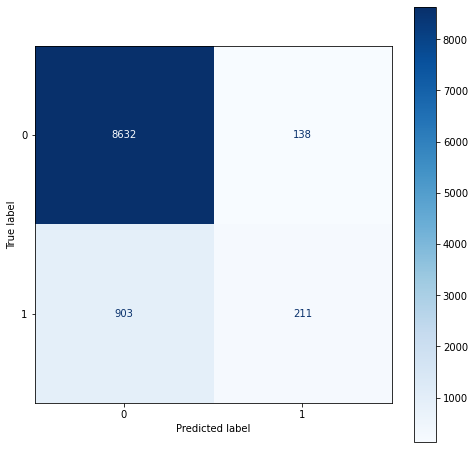

In [ ]:
fig, ax = plt.subplots(figsize = (8, 8))
plot_confusion_matrix(best_estimator, X_val, y_val, cmap = plt.cm.Blues, ax=ax)
plt.show()

Precision: 0.6045845272206304
Recall: 0.18940754039497307


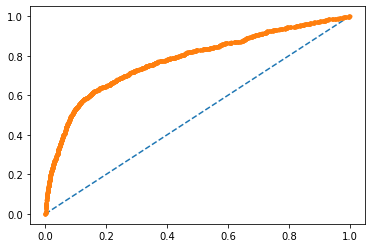

In [ ]:
plot_roc_curve("LogisticRegression", fpr, tpr)
precision, recall = precision_recall_score(y_val, y_pred)
print(f"Precision: {precision}")
print(f"Recall: {recall}")

### CatboostClassifier with GPU

In [ ]:
pipe = Pipeline([('dict', DictVectorizer(sparse=False)) ,('scaler', StandardScaler()), ('catboost', CatBoostClassifier(silent=True, random_state = 10, task_type="GPU",devices='0:1'))])

In [ ]:
grid_param = {
    'catboost__n_estimators': [100, 250],
    'catboost__learning_rate': [1e-1, 1e-3, 1e+0],
    'catboost__max_depth': [3, 7],
    }

cv = KFold(n_splits = 5, random_state=10, shuffle=True)
grid_search = GridSearchCV(pipe, grid_param, scoring = "f1_weighted", cv = cv, n_jobs=-1)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=10, shuffle=True),
             estimator=Pipeline(steps=[('dict', DictVectorizer(sparse=False)),
                                       ('scaler', StandardScaler()),
                                       ('catboost',
                                        <catboost.core.CatBoostClassifier object at 0x7f4ec89e4ed0>)]),
             n_jobs=-1,
             param_grid={'catboost__learning_rate': [0.1, 0.001, 1.0],
                         'catboost__max_depth': [3, 7],
                         'catboost__n_estimators': [100, 250]},
             scoring='f1_weighted')

In [ ]:
best_estimator = grid_search.best_estimator_
print(f"the best params is : {grid_search.best_params_}")

the best params is : {'catboost__learning_rate': 0.1, 'catboost__max_depth': 7, 'catboost__n_estimators': 250}


In [ ]:
y_pred = best_estimator.predict(X_val)
y_pred_proba = best_estimator.predict_proba(X_val)[:, 1]

In [ ]:
fpr,  tpr, thresholds = roc_curve(y_val, y_pred_proba)

In [ ]:
print(classification_report(y_val, y_pred, target_names = ['class_0', 'class_1'], digits=5))

              precision    recall  f1-score   support

     class_0    0.91059   0.98016   0.94410      8770
     class_1    0.60811   0.24237   0.34660      1114

    accuracy                        0.89701      9884
   macro avg    0.75935   0.61126   0.64535      9884
weighted avg    0.87650   0.89701   0.87675      9884



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


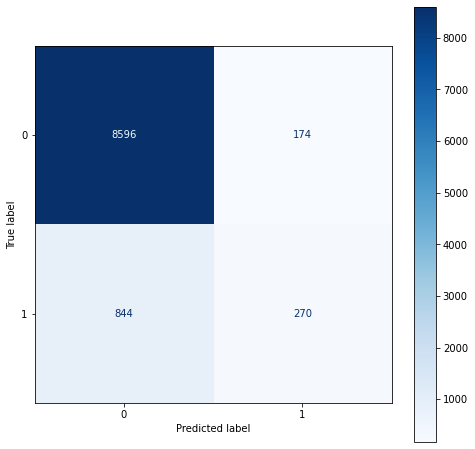

In [ ]:
fig, ax = plt.subplots(figsize = (8, 8))
plot_confusion_matrix(best_estimator, X_val, y_val, cmap = plt.cm.Blues, ax=ax)
plt.show()

Precision: 0.6081081081081081
Recall: 0.24236983842010773


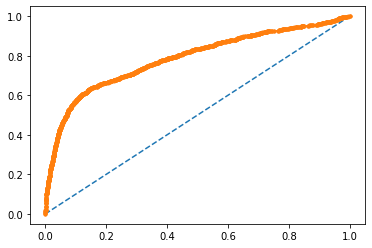

In [ ]:
plot_roc_curve("hyperparameter_Xgboost",fpr, tpr)
precision, recall = precision_recall_score(y_val, y_pred)
print(f"Precision: {precision}")
print(f"Recall: {recall}")

Out of the all models we have trained, catBoostClassifier performed well. Now we handle the imbalanced dataset.

##  Handling Imbalanced Dataset

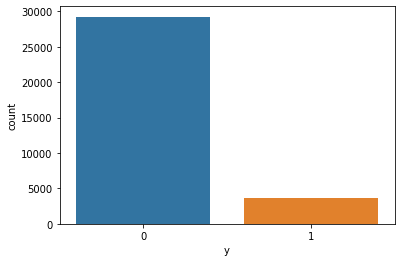

In [ ]:
sns.countplot(x = df_train['y'], label="Count")
plt.show()

 Our dataset is very imbalanced. The '0' class has more than 80% data compared to '1' class.

### Undersampling

In [ ]:
!pip install imblearn --quiet

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
y_train.value_counts()

0    20463
1     2598
Name: y, dtype: int64

#### RandomSampler

In [ ]:
rus = RandomUnderSampler(random_state = 0)

In [ ]:
X_train, X_val , y_train, y_val = train_test_split(df_train.drop('y', axis=1), df_train['y'], test_size = 0.3, shuffle=True, random_state = 2, stratify = df_train['y'])

In [ ]:
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

In [ ]:
y_train_rus.value_counts()

1    2598
0    2598
Name: y, dtype: int64

##### CatBoost

              precision    recall  f1-score   support

     class_0    0.94728   0.85428   0.89838      8770
     class_1    0.35291   0.62567   0.45128      1114

    accuracy                        0.82851      9884
   macro avg    0.65009   0.73997   0.67483      9884
weighted avg    0.88029   0.82851   0.84798      9884



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


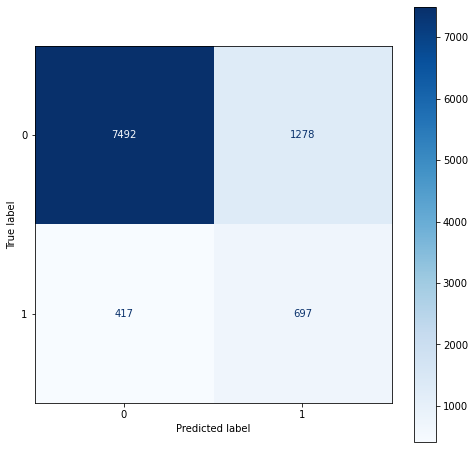

In [ ]:
pipe = Pipeline([('dict', DictVectorizer(sparse=False)), ('scaler', StandardScaler()), ('catboost', CatBoostClassifier(silent=True, random_state = 10, task_type="GPU",devices='0:1'))])
grid_param = {
    'catboost__n_estimators': [100, 250],
    'catboost__learning_rate': [1e-1, 1e-3, 1e+0],
    'catboost__max_depth': [3, 7],
    }

X_train_rus =  X_train_rus.to_dict("records")
X_val = X_val.to_dict("records")

cv = KFold(n_splits = 5, random_state=10, shuffle=True)
grid_search = GridSearchCV(pipe, grid_param, scoring = "f1_weighted", cv = cv, n_jobs=-1)
grid_search.fit(X_train_rus, y_train_rus)
best_estimator = grid_search.best_estimator_


y_pred = best_estimator.predict(X_val)
y_pred_proba = best_estimator.predict_proba(X_val)[:, 1]

print(classification_report(y_val, y_pred, target_names = ['class_0', 'class_1'], digits=5))

fig, ax = plt.subplots(figsize = (8, 8))
plot_confusion_matrix(best_estimator, X_val, y_val, cmap = plt.cm.Blues, ax=ax)
plt.show()

In [ ]:
print(f"the best params is : {grid_search.best_params_}")

the best params is : {'catboost__learning_rate': 0.1, 'catboost__max_depth': 3, 'catboost__n_estimators': 100}


In [ ]:
precision, recall = precision_recall_score(y_val, y_pred)
print(f"Precision: {precision}")
print(f"Recall: {recall}")

Precision: 0.3529113924050633
Recall: 0.625673249551167


##### XGBClassifier

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


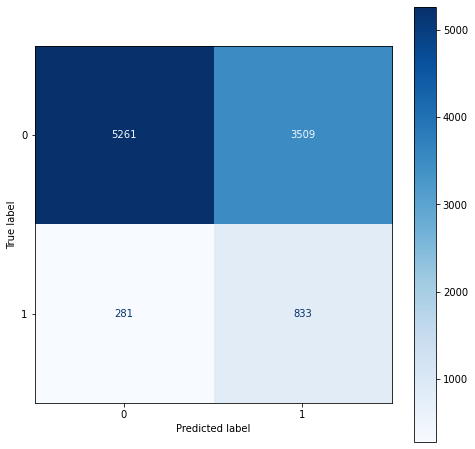

In [ ]:
pipe = Pipeline([('dict', DictVectorizer(sparse=False)),('scaler', StandardScaler()), ('xgb', XGBClassifier(random_state = 10, tee_method = "gpu_hist"))])
grid_param = {
    'xgb__n_estimators': [100, 200, 250, 400],
    'xgb__max_depth': [3, 6, 9],
    'xgb__eta': [1e-1, 3e-1, 1e+0],
    'xgb__scale_pos_weight': [3, 5]
}

cv = KFold(n_splits = 5, random_state=10, shuffle=True)
grid_search = GridSearchCV(pipe, grid_param, scoring = "f1_weighted", cv = cv, n_jobs=-1)

grid_search.fit(X_train_rus, y_train_rus)
best_estimator = grid_search.best_estimator_

y_pred = best_estimator.predict(X_val)
y_pred_proba = best_estimator.predict_proba(X_val)[:, 1]

fig, ax = plt.subplots(figsize = (8, 8))
plot_confusion_matrix(best_estimator, X_val, y_val, cmap = plt.cm.Blues, ax=ax)
plt.show()

In [ ]:
print(f"the best params is : {grid_search.best_params_}")
print(classification_report(y_val, y_pred, target_names = ['class_0', 'class_1'], digits=5))

the best params is : {'xgb__eta': 0.1, 'xgb__max_depth': 9, 'xgb__n_estimators': 400, 'xgb__scale_pos_weight': 3}
              precision    recall  f1-score   support

     class_0    0.94930   0.59989   0.73519      8770
     class_1    0.19185   0.74776   0.30535      1114

    accuracy                        0.61655      9884
   macro avg    0.57057   0.67382   0.52027      9884
weighted avg    0.86393   0.61655   0.68674      9884



In [ ]:
precision, recall = precision_recall_score(y_val, y_pred)
print(f"Precision: {precision}")
print(f"Recall: {recall}")

Precision: 0.19184707508060803
Recall: 0.7477558348294434


#####LogisticRegression

              precision    recall  f1-score   support

     class_0    0.94597   0.84242   0.89119      8770
     class_1    0.33365   0.62118   0.43413      1114

    accuracy                        0.81748      9884
   macro avg    0.63981   0.73180   0.66266      9884
weighted avg    0.87695   0.81748   0.83968      9884



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


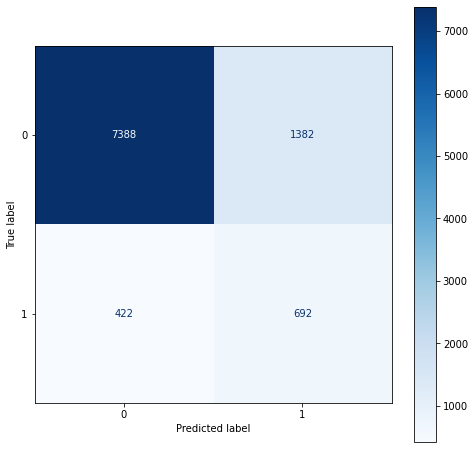

In [ ]:
pipe = Pipeline([("dic", DictVectorizer(sparse=False))
                 ,
                 ('scaler', StandardScaler()), ('lr', LogisticRegression(random_state = 10, max_iter = 5000))])
grid_search = {
    "lr__C": [1e-1, 1e+0, 1e-3, 5e+0],
    'lr__solver': ['sag', 'liblinear'],
}
cv = KFold(n_splits = 5, random_state=10, shuffle=True)
grid_search = GridSearchCV(pipe, grid_search, scoring = "f1_weighted", cv = cv, n_jobs=1)

grid_search.fit(X_train_rus, y_train_rus)
best_estimator = grid_search.best_estimator_

y_pred = best_estimator.predict(X_val)
y_pred_proba = best_estimator.predict_proba(X_val)[:, 1]

print(classification_report(y_val, y_pred, target_names = ['class_0', 'class_1'], digits=5))

fig, ax = plt.subplots(figsize = (8, 8))
plot_confusion_matrix(best_estimator, X_val, y_val, cmap = plt.cm.Blues, ax=ax)
plt.show()

In [ ]:
print(f"the best params is : {grid_search.best_params_}")
precision, recall = precision_recall_score(y_val, y_pred)
print(f"Precision: {precision}")
print(f"Recall: {recall}")


the best params is : {'lr__C': 0.1, 'lr__solver': 'liblinear'}
Precision: 0.33365477338476374
Recall: 0.6211849192100538


### OverSampling

##### SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
sm = SMOTE(random_state=2)
X_train, X_val , y_train, y_val = train_test_split(df_train.drop('y', axis=1), df_train['y'], test_size = 0.3, shuffle=True, random_state = 2, stratify = df_train['y'])

In [ ]:
dv = DictVectorizer(sparse=False)

In [ ]:
X_train = X_train.to_dict("records")
X_val = X_val.to_dict("records")

In [ ]:
X_train = dv.fit_transform(X_train)
X_val = dv.transform(X_val)

In [ ]:
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

In [ ]:
y_train_smote.value_counts()

1    20463
0    20463
Name: y, dtype: int64

###### LogisticRegression



              precision    recall  f1-score   support

     class_0    0.94568   0.84367   0.89177      8770
     class_1    0.33447   0.61849   0.43415      1114

    accuracy                        0.81829      9884
   macro avg    0.64007   0.73108   0.66296      9884
weighted avg    0.87679   0.81829   0.84019      9884



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


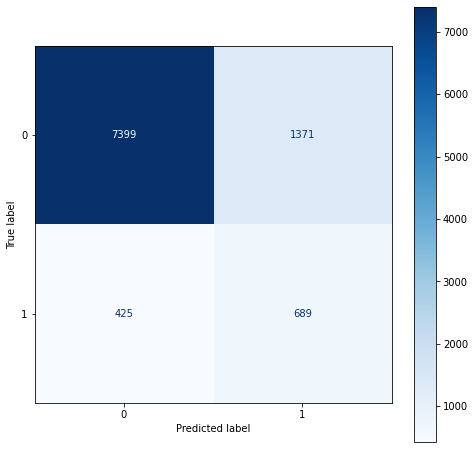

In [ ]:
pipe = Pipeline([('scaler', StandardScaler()), ('lr', LogisticRegression(random_state = 10, max_iter = 5000))])
grid_search = {
    "lr__C": [1e-1, 1e+0, 1e-3, 5e+0],
    'lr__solver': ['sag', 'liblinear'],
}
cv = KFold(n_splits = 5, random_state=10, shuffle=True)
grid_search = GridSearchCV(pipe, grid_search, scoring = "f1_weighted", cv = cv, n_jobs=1)

grid_search.fit(X_train_smote, y_train_smote)
best_estimator = grid_search.best_estimator_

y_pred = best_estimator.predict(X_val)
y_pred_proba = best_estimator.predict_proba(X_val)[:, 1]

print(classification_report(y_val, y_pred, target_names = ['class_0', 'class_1'], digits=5))

fig, ax = plt.subplots(figsize = (8, 8))
plot_confusion_matrix(best_estimator, X_val, y_val, cmap = plt.cm.Blues, ax=ax)
plt.show()

In [ ]:
print(f"the best params is : {grid_search.best_params_}")
precision, recall = precision_recall_score(y_val, y_pred)
print(f"Precision: {precision}")
print(f"Recall: {recall}")

the best params is : {'lr__C': 0.1, 'lr__solver': 'sag'}
Precision: 0.3344660194174757
Recall: 0.618491921005386


###### CatBoost

              precision    recall  f1-score   support

     class_0    0.94568   0.84367   0.89177      8770
     class_1    0.33447   0.61849   0.43415      1114

    accuracy                        0.81829      9884
   macro avg    0.64007   0.73108   0.66296      9884
weighted avg    0.87679   0.81829   0.84019      9884



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


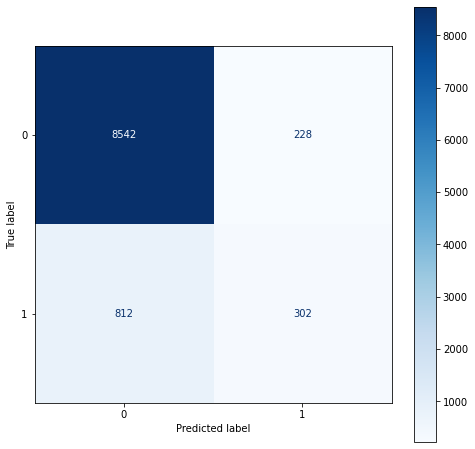

In [ ]:
pipe = Pipeline([('scaler', StandardScaler()), ('catboost', CatBoostClassifier(silent=True, random_state = 10, task_type="GPU",devices='0:1'))])
grid_param = {
    'catboost__n_estimators': [100, 250],
    'catboost__learning_rate': [1e-1, 1e-3, 1e+0],
    'catboost__max_depth': [3, 7],
    }

cv = KFold(n_splits = 5, random_state=10, shuffle=True)
grid_search = GridSearchCV(pipe, grid_param, scoring = "f1_weighted", cv = cv, n_jobs=-1)

grid_search.fit(X_train_smote, y_train_smote)
best_estimator = grid_search.best_estimator_

print(classification_report(y_val, y_pred, target_names = ['class_0', 'class_1'], digits=5))
y_pred = best_estimator.predict(X_val)
y_pred_proba = best_estimator.predict_proba(X_val)[:, 1]

fig, ax = plt.subplots(figsize = (8, 8))
plot_confusion_matrix(best_estimator, X_val, y_val, cmap = plt.cm.Blues, ax=ax)
plt.show()

In [ ]:
print(f"the best params is : {grid_search.best_params_}")
precision, recall = precision_recall_score(y_val, y_pred)
print(f"Precision: {precision}")
print(f"Recall: {recall}")

the best params is : {'catboost__learning_rate': 0.1, 'catboost__max_depth': 7, 'catboost__n_estimators': 250}
Precision: 0.569811320754717
Recall: 0.2710951526032316


# Final result:

For training and predicting we will be using RANDOM SAMPLER under-sampling , dictvectorizer, standardscaler + CatboostCLASSIFIER model and params : {'catboost__learning_rate': 0.1, 'catboost__max_depth': 3, 'catboost__n_estimators': 100}

# Train and Save the model

In [4]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from catboost import CatBoostClassifier
import joblib

import pandas as pd

In [42]:
df_train = pd.read_csv("/content/drive/MyDrive/capstone project/bank_marketing_train.csv")
df_test = pd.read_csv("/content/drive/MyDrive/capstone project/bank_marketing_test.csv")

In [43]:
df_train.shape, df_test.shape

((32951, 21), (8237, 21))

In [44]:
df_train.columns, df_test.columns

(Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
        'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
        'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
        'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
       dtype='object'),
 Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
        'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
        'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
        'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
       dtype='object'))

In [45]:
df_train.drop_duplicates(inplace=True)
df_test.drop_duplicates(inplace=True)

In [46]:
def drop_corr_features(df):
  df = df.drop(['euribor3m', 'nr.employed'], axis=1)
  return df
# drop corr columns

In [47]:
df_train = drop_corr_features(df_train)
df_test = drop_corr_features(df_test)

In [48]:
df_train.shape, df_test.shape

((32945, 19), (8235, 19))

In [49]:
# change the columns 
df_train.rename(columns = {'emp.var.rate': 'emp_var_rate', 'cons.price.idx': 'cons_price_idx', 'cons.conf.idx': 'cons_conf_idx'}, inplace=True)
df_test.rename(columns = {'emp.var.rate': 'emp_var_rate', 'cons.price.idx': 'cons_price_idx' ,'cons.conf.idx': 'cons_conf_idx'}, inplace=True)

In [50]:
#change the categorical_value to integer
poutcome_change = {
    "nonexistent": -1,
    "failure": 0,
    "success": 1
}

loan_change = {
    "no": 0,
    "yes": 1,
    "unknown": -1
}

housing_change = {
    "no": 0,
    "yes": 1,
    "unknown": -1
}

default_change = {
    "yes": 1,
    "unknown": -1,
    "no": 0
}


def change_feature(df):
  df.default  = df.default.map(default_change)
  df.housing = df.housing.map(housing_change)
  df.loan = df.loan.map(loan_change)
  df.poutcome = df.poutcome.map(poutcome_change)
  df.pdays = df.replace({999: -1})
  return df


In [51]:
df_train = change_feature(df_train)
df_test = change_feature(df_test)

In [54]:
df_train.isna().sum(), df_test.isna().sum()

(age               0
 job               0
 marital           0
 education         0
 default           0
 housing           0
 loan              0
 contact           0
 month             0
 day_of_week       0
 duration          0
 campaign          0
 pdays             0
 previous          0
 poutcome          0
 emp_var_rate      0
 cons_price_idx    0
 cons_conf_idx     0
 y                 0
 dtype: int64, age               0
 job               0
 marital           0
 education         0
 default           0
 housing           0
 loan              0
 contact           0
 month             0
 day_of_week       0
 duration          0
 campaign          0
 pdays             0
 previous          0
 poutcome          0
 emp_var_rate      0
 cons_price_idx    0
 cons_conf_idx     0
 y                 0
 dtype: int64)

In [55]:
rus = RandomUnderSampler(random_state = 2)

In [56]:
X_train, y_train = df_train.drop("y", axis=1), df_train['y']

In [57]:
X_train.shape, y_train.value_counts()

((32945, 18), no     29233
 yes     3712
 Name: y, dtype: int64)

In [58]:
y_train = y_train.map(lambda x: 0 if x=="no" else 1)

In [59]:
y_train.value_counts()

0    29233
1     3712
Name: y, dtype: int64

In [61]:
# First vectorize our data
dv = DictVectorizer(sparse=False)

In [62]:
X_train_dict = X_train.to_dict("records")

In [63]:
X_train = dv.fit_transform(X_train_dict)

In [64]:
# now undersample our data

X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

In [65]:
y_train_rus.value_counts(), X_train_rus.shape

(1    3712
 0    3712
 Name: y, dtype: int64, (7424, 53))

In [66]:
# check our test dataset
df_test.shape

(8235, 19)

In [67]:
# split
X_test, y_test = df_test.drop("y", axis=1), df_test['y']

In [68]:
y_test.value_counts()

no     7307
yes     928
Name: y, dtype: int64

In [69]:
# now we change our test dataset to vectorizer

X_test_dict = X_test.to_dict("records")

In [70]:
X_test = dv.transform(X_test_dict)

In [71]:
y_test.value_counts()

no     7307
yes     928
Name: y, dtype: int64

In [72]:
y_test = y_test.map(lambda x: 0 if x=="no" else 1)

In [73]:
y_test.value_counts(), y_train_rus.value_counts()

(0    7307
 1     928
 Name: y, dtype: int64, 1    3712
 0    3712
 Name: y, dtype: int64)

In [74]:
X_test.shape

(8235, 53)

 {'catboost__learning_rate': 0.1, 'catboost__max_depth': 3, 'catboost__n_estimators': 100}

In [75]:
params = {'eta': 0.1, 
          'max_depth': 3, 
          'n_estimators': 100, }

In [76]:
pipe_train = Pipeline([('scaler', StandardScaler()), ('catboost', CatBoostClassifier(silent=True, random_state = 10, task_type="GPU",devices='0:1', **params))])

In [77]:
pipe_train.fit(X_train_rus, y_train_rus)

Pipeline(steps=[('scaler', StandardScaler()),
                ('catboost',
                 <catboost.core.CatBoostClassifier object at 0x7fb1bf39bc90>)])

In [78]:
y_pred = pipe_train.predict(X_test)
y_pred_proba = pipe_train.predict_proba(X_test)[:, 1]

In [79]:
confusion_matrix(y_test, y_pred)

array([[6135, 1172],
       [  56,  872]])

In [80]:
roc_auc_score(y_test, y_pred_proba)

0.9473290845339613

In [81]:
# we got recall of 0.93 and precision of 0.42, which is quite good. 
print(classification_report(y_test, y_pred, digits=5))

              precision    recall  f1-score   support

           0    0.99095   0.83961   0.90902      7307
           1    0.42661   0.93966   0.58681       928

    accuracy                        0.85088      8235
   macro avg    0.70878   0.88963   0.74792      8235
weighted avg    0.92736   0.85088   0.87271      8235



In [82]:
joblib.dump(dv, "/content/drive/MyDrive/dictvectorizer.joblib")

['/content/drive/MyDrive/dictvectorizer.joblib']

In [84]:
joblib.dump(pipe_train, "/content/drive/MyDrive/catboost.model")

['/content/drive/MyDrive/catboost.model']